In [3]:
#libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [4]:
#get data from yahoo of any company
data_frame=web.DataReader('TSLA',data_source='yahoo',start='2010-01-01',end='2022-01-01')

In [5]:
#see the data
data_frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000000,3.508000,3.800000,4.778000,93831500.0,4.778000
2010-06-30,6.084000,4.660000,5.158000,4.766000,85935500.0,4.766000
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
...,...,...,...,...,...,...
2021-12-27,1117.000000,1070.719971,1073.670044,1093.939941,23715300.0,1093.939941
2021-12-28,1119.000000,1078.420044,1109.489990,1088.469971,20108000.0,1088.469971
2021-12-29,1104.000000,1064.140015,1098.640015,1086.189941,18718000.0,1086.189941


In [6]:
#rows and columns
data_frame.shape

(2899, 6)

<AxesSubplot:xlabel='Date'>

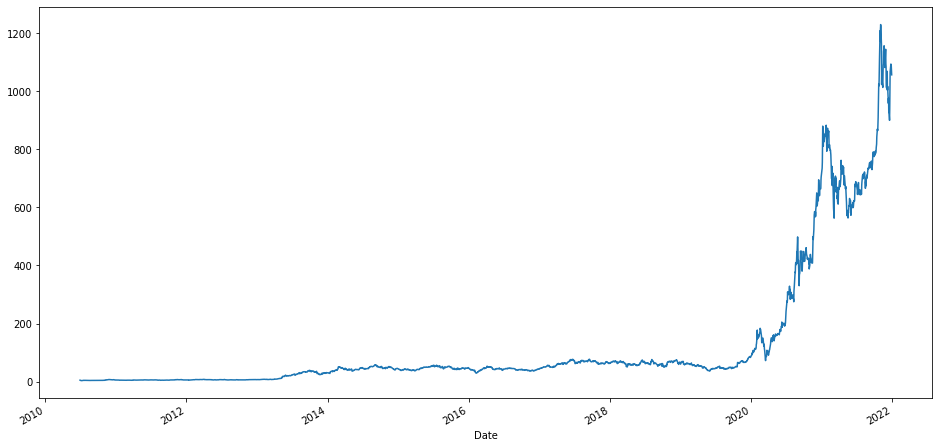

In [7]:
#see how the data looks like graphically
data_frame['Close'].plot(figsize=(16,8),label='TSLA')

In [8]:
#get the close price of the stock data in a numpy array
data_close=data_frame.filter(['Close']).values
#training set 80% of the data
training_data_len=math.ceil(len(data_close)*0.8)
training_data_len


2320

In [9]:
#scaling  the data
scale=MinMaxScaler(feature_range=(0,1))
scaled_data=scale.fit_transform(data_close)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.88284484],
       [0.86992455],
       [0.858871  ]])

In [10]:
training_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(training_data)):
    x_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([1.31893193e-03, 1.30914992e-03, 1.00427966e-03, 5.54310014e-04,
       5.05398786e-05, 0.00000000e+00, 2.70633795e-04, 2.60851783e-04,
       2.03790498e-04, 3.81495759e-04, 6.58650766e-04, 6.66802378e-04,
       7.89076560e-04, 9.96127858e-04, 7.33645675e-04, 7.20603251e-04,
       8.47768245e-04, 8.95047712e-04, 8.39616827e-04, 7.74403930e-04,
       8.02119373e-04, 7.41797482e-04, 6.74953990e-04, 8.34725821e-04,
       1.00264907e-03, 8.90156706e-04, 7.58100706e-04, 6.17892705e-04,
       6.19523105e-04, 5.26594571e-04, 3.42367904e-04, 2.93458231e-04,
       4.10841601e-04, 4.85836511e-04, 5.46158402e-04, 4.84206111e-04,
       4.87466717e-04, 5.38006790e-04, 7.05930233e-04, 5.54310014e-04,
       6.68432778e-04, 6.43977942e-04, 6.35826329e-04, 6.63541772e-04,
       5.99959081e-04, 7.58100706e-04, 8.57550257e-04, 8.55920051e-04,
       7.72773336e-04, 8.31465021e-04, 8.00489167e-04, 7.12451445e-04,
       8.02119373e-04, 8.67332270e-04, 1.00754008e-03, 8.37986621e-04,
     

In [11]:
#convert training datasets to numpy and reshaping the data
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2260, 60, 1)

In [15]:
#lstm model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
#running the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2260/2260 [==============================] - 48s 20ms/step - loss: 1.7982e-05


In [ ]:
#creating test-data set
